In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

This is my project where I use Apriori to generate frequent word and character sets and compare the average sales of titles containing these words and characters to the average sales accross the video game genres in this dataset. I end up using a modified support threshold that weights titles with high sales more than titles with lower sales to generate a frequent word triple that has a much stronger correlation to high average sales than the average sales of the different genres.  
Data Set - https://www.kaggle.com/gregorut/videogamesales

Clarity of description of data, methods used so far:  
  
The video game data set was put together by Gregory Smith on kaggle, and has 11 attributes for the video games. It contains the video game name, platform, and genre, as well as the publisher of the game. In addition to these, the year the game was released is an attribute as well, going back to games released in 1980 like Asteroids and Missile Command. There is also the number of sales for Northern America, Europe, Japan, and other regions, as well as the total number of sales as global sales. Lastly, there is a rank for each video game, which correlates to the game’s rank among all video games listed in terms of global sales.  
To scrub the data set, I first had to remove the context from some titles from the actual title name. For instance, the title "Star Wars Battlefront" was represented by "Star Wars Battlefront (2015)" to distinguish it from an earlier title with the same name. As that is not a part of the actual title, I removed the parts in quotations from these titles. I also removed any unwanted characters from the titles, such as accents and brackets. I decided to keep some special characters like '!' and '?' as I think these are valid parts of the titles.  
So far I have scrubbed the titles and set them up so that I can use the Apriori algorithm on them. I have also found some important characteristics of the data set and listed them below.

In [2]:
dat=pd.read_csv('../data/vgsales.csv', encoding='UTF-8')
print("Loading data set")
dat.head(5)

Loading data set


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Rudimentary exploration of dataset  
Listed: Characters before and after scrubbing, Max and Min titles in terms of sales numbers, Average sales per genre, character counts present in titles.

In [3]:
titles = dat["Name"]
titles
charList = ""
titleLen = len(titles)
temp = 0
while temp < titleLen:
    charList = charList + titles[temp]
    temp = temp+1
charList = charList.lower()
print("Characters present initially")
print(set(charList))
print(len(set(charList)))
titleList = []
for x in titles:
    titleList.append(x)
temp2 = 0
for y in titleList: #Clean titleList
    temp4 = 0
    yTemp = y
    while temp4 < len(y):
        if y[temp4] == 'ø':
            print("ø found")
        temp4 = temp4 + 1
    if '(' in y:
        z = y.split('(')
        y = z[0]
    y = y.replace("♪","")
    y = y.replace(":","")
    y = y.replace(";","")
    y = y.replace("\u200b","")
    y = y.replace("°","")
    y = y.replace("-","")
    y = y.replace(",","")
    y = y.replace("/","")
    y = y.replace("'","")
    y = y.replace("é","e")
    y = y.replace("(","")
    y = y.replace(")","")
    y = y.replace("*","")
    y = y.replace("à","a")
    y = y.replace("¡","i")
    y = y.replace(".","")
    y = y.replace("α","")
    y = y.replace("[","")
    y = y.replace("·","")
    y = y.replace("ë","e")
    y = y.replace("Ø","o")
    y = y.replace("ö","o")
    y = y.replace("~","")
    y = y.replace("ä","a")
    y = y.replace("]","")
    y = y.replace("×","x")
    char = 'ø'
    if char in y:
        print("Y")
        titleList.remove(y)
    else:
        
        titleList[temp2] = y
    temp2 = temp2+1
charList2 = ""
titleLen2 = len(titleList)
temp3 = 0
while temp3 < titleLen2: #Get all present characters
    charList2 = charList2 + titleList[temp3]
    temp3 = temp3+1
charList2 = charList2.lower()
print("Characters present after cleaning")
print(set(charList2))
print(len(set(charList2)))

Characters present initially
{'-', '1', 'p', '3', "'", '°', '@', '?', '7', 'q', '¡', 'v', 'x', '.', 'w', 'j', 'z', ';', 'd', 'o', '·', '×', '♪', 'a', '\u200b', '~', 'é', '&', '9', 'α', '8', 'k', '!', 's', 'ø', 'e', '$', '0', 'b', 'f', '6', '2', '5', 'ö', '(', '#', '%', ')', ' ', 'l', '*', 'ä', ':', 't', '[', 'u', '/', 'c', 'à', 'ë', 'm', 'i', ',', 'r', 'n', ']', 'g', '4', '+', 'y', 'h'}
71
Characters present after cleaning
{'1', '@', 'p', '3', '?', '7', 'q', 'v', 'x', 'w', 'j', 'z', 'd', 'o', 'a', '9', '&', '8', 'k', '!', 's', 'e', '$', '0', 'b', 'f', '6', '2', '5', '#', '%', ' ', 'l', 't', 'u', 'c', 'm', 'i', 'r', 'n', 'g', '4', '+', 'y', 'h'}
45


In [4]:
#Get average sales per genre as well as Max and Min Titles
maxSales = 0
maxSalesTitle = ""
minSales = math.inf
minSalesTitle = ""
genres = []
for i, x in dat.iterrows():
    genres.append(x['Genre'])
    if x['Global_Sales'] > maxSales:
        maxSales = x['Global_Sales']
        maxSalesTitle = x['Name']
    if x['Global_Sales'] < minSales:
        minSales = x['Global_Sales']
        minSalesTitle = x['Name']
print("Max and Min titles")
print(maxSales, maxSalesTitle)
print(minSales, minSalesTitle)
genres = set(genres)
print("Genres Present: ", genres)
#Get average sales for each genre
genreList = []
uTitle = []
for x in genres:
    genreList.append([x,0,0])
for i, y in dat.iterrows():
    for z in genreList:
        if z[0] == y['Genre']:
            z[1] = z[1] + y['Global_Sales']
            if y['Name'] not in uTitle: 
                z[2] = z[2] + 1
                uTitle.append(y['Name'])
temp = 0
#Get average sales per genre
while temp < len(genreList):
    genreList[temp].append(genreList[temp][1] / genreList[temp][2])
    temp = temp + 1
print("Average Sales per Genre: ")
for p in genreList:
    print("Genre: ",p[0])
    print("Average Sales: ",np.round(p[3] * 1000000, 2),"Units")
    print("")
#Get ordered genres
temp = 0
maxGenreSaleOrder = []
genreSalesListC = genreList.copy()
while temp < len(genreList):
    maxSaleVal = 0
    maxSaleInd = 0
    temp2 = 0
    while temp2 < len(genreSalesListC):
        if genreSalesListC[temp2][3] > maxSaleVal:
            maxSaleVal = genreSalesListC[temp2][3]
            maxSaleInd = temp2
            maxSaleI = genreSalesListC[temp2]
        temp2 = temp2 + 1
    maxSaleI[3] = maxSaleI[3] * 1000000
    maxGenreSaleOrder.append(maxSaleI)
    genreSalesListC.remove(genreSalesListC[maxSaleInd])
    temp = temp + 1
print(maxGenreSaleOrder)

Max and Min titles
82.74 Wii Sports
0.01 Turok
Genres Present:  {'Role-Playing', 'Puzzle', 'Sports', 'Racing', 'Simulation', 'Fighting', 'Shooter', 'Adventure', 'Strategy', 'Misc', 'Action', 'Platform'}
Average Sales per Genre: 
Genre:  Role-Playing
Average Sales:  760762.92 Units

Genre:  Puzzle
Average Sales:  490881.76 Units

Genre:  Sports
Average Sales:  965141.41 Units

Genre:  Racing
Average Sales:  948238.34 Units

Genre:  Simulation
Average Sales:  540220.39 Units

Genre:  Fighting
Average Sales:  733513.07 Units

Genre:  Shooter
Average Sales:  1269730.72 Units

Genre:  Adventure
Average Sales:  228091.6 Units

Genre:  Strategy
Average Sales:  300893.47 Units

Genre:  Misc
Average Sales:  610369.25 Units

Genre:  Action
Average Sales:  910650.03 Units

Genre:  Platform
Average Sales:  1411494.06 Units

[['Platform', 831.3699999999974, 589, 1411494.0577249532], ['Shooter', 1037.3699999999901, 817, 1269730.7221542108], ['Sports', 1330.929999999988, 1379, 965141.406816525], ['Ra

In [5]:
#Printing count of characters present in titles
count = []
charList2Set = set(charList2)
l = []
for z in charList2Set:
    l.append(z)
for x in charList2Set:
    count.append(0)
for y in charList2:
    char = l.index(y)
    count[char] = count[char] + 1
temp5 = 0
while temp5 < len(count):
    print("Count for character ", l[temp5], ": ", count[temp5])
    temp5 = temp5 + 1

Count for character  1 :  1129
Count for character  @ :  18
Count for character  p :  7079
Count for character  3 :  868
Count for character  ? :  86
Count for character  7 :  246
Count for character  q :  415
Count for character  v :  3526
Count for character  x :  1189
Count for character  w :  4066
Count for character  j :  1472
Count for character  z :  1232
Count for character  d :  11759
Count for character  o :  25420
Count for character  a :  29965
Count for character  9 :  349
Count for character  & :  340
Count for character  8 :  228
Count for character  k :  6851
Count for character  ! :  883
Count for character  s :  22066
Count for character  e :  33766
Count for character  $ :  3
Count for character  0 :  2096
Count for character  b :  6017
Count for character  f :  6215
Count for character  6 :  308
Count for character  2 :  2525
Count for character  5 :  363
Count for character  # :  8
Count for character  % :  1
Count for character    :  48908
Count for character  l :

Results of preliminary analysis:  
  
I found the average sales for each of the 12 genres, so ideally I can use the Apriori algorithm to get around 12 combinations of characters/words and compare the average sales of titles with those combinations to the calculated average sales of each genre. From the character counts form the last cell, the most popular characters are e, a and o, so I expect that the combinations found through the Apriori algorithm will primarily contain those characters, while some of the non-standard characters I decided to keep like "%" and "$" have single digit representation, so those will almost certainly not show up in my final combinations. My next steps will be to run Apriori on the titles seperated by both characters and words, find the average sales of titles containing these combinations, compare those to the average sales of the 12 genres, and graph my comparisons.

Time to prepare my lists of characters and words for the Apriori  
First thing to do is make sure each title is only listed once. Currently, there are different entries for each platform release for each title. For instance, Fallout4 was released on PS4 , XboxOne, and PC. So for Fallout 4, there are 3 seperate entries for the game, one for each platform. So I'll make sure that each title is only represented once in my list of titles, and then make sure I take the total sales from all platform releases for each game when getting my sales average for each combination of characters and words.

In [6]:
#Setting up and running Apriori
#Used HW5 Solutions as a help resource for implementing Apriori

titleListUnique = set(titleList)
print("Length of list of all titles before accounting for multiple platforms: ", len(titleList))
print("Length of list of all titles after accounting for multiple platforms: ", len(titleListUnique))
updatedTitleList = []
for x in titleListUnique:
    updatedTitleList.append(x)

#Now to make the lists containing the titles split by characters and words
titleListByChars = []
titleListByCharsUnique = []
lookupTableChars = {}
temp3 = 0
for y in updatedTitleList:
    y = y.lower()
    y = y.replace(" ","") #For chars list remove white space
    temp = 0
    tempL = []
    tempLU = []
    #Get lists for titles seperated by characters
    while temp < len(y):
        tempL.append(y[temp])
        if y[temp] not in tempLU:
            tempLU.append(y[temp])
        if y[temp] not in lookupTableChars.keys():
            lookupTableChars[y[temp]] = temp3
            temp3 = temp3 + 1
        temp = temp + 1
    titleListByChars.append(tempL)
    titleListByCharsUnique.append(tempLU)
    
print(titleListByCharsUnique[0])
print(titleListByChars[0])


titleListByWords = []
titleListByWordsUnique = []
lookupTableWords = {}
temp4 = 0
for a in updatedTitleList:
    a = a.lower()
    a = a.split(" ") #Use white spaces to split title into words
    tempL2 = []
    tempLU2 = []
    temp2 = 0
    while temp2 < len(a):
        tempL2.append(a[temp2])
        if a[temp2] not in tempLU2:
            tempLU2.append(a[temp2])
        if a[temp2] not in lookupTableWords.keys():
            lookupTableWords[a[temp2]] = temp4
            temp4 = temp4 + 1
        temp2 = temp2 + 1
    titleListByWords.append(tempL2)
    titleListByWordsUnique.append(tempLU2)
print(titleListByWordsUnique[0])
#Counts for characters
#K=1 run
temp5 = 0
charCounts = []
while temp5 < len(lookupTableChars): #Append a 0 for each character to the count list
    charCounts.append(0)
    temp5 = temp5 + 1
for cl in titleListByCharsUnique: #Go through each title and if char is present then add 1 to count
    for c in cl:
        charCounts[lookupTableChars[c]] = charCounts[lookupTableChars[c]] + 1
supportThreshold = len(titleListByCharsUnique) * 0.57#Starting with a High Threshold value, wanted to reduce to 25% 
qChars = []
for ch in lookupTableChars.keys(): #Go through each character
    ind = lookupTableChars[ch]
    if charCounts[ind] > supportThreshold: #See if character is greater than support threshold
        qChars.append(ch) #If character is greater than support threshold, add to qualified characters list
#Now for K=2
print("Frequent characters after k=1 run: ", len(qChars) / len(charCounts))
qCharPairs = []
temp6 = 0
#Getting possible combinations for qualified pairs using qualified characters from K=1 run
while temp6 < len(qChars):
    char1 = qChars[temp6]
    temp7 = temp6 + 1 #Start from one spot further than temp6
    while temp7 < len(qChars):#from temp6+1 to end of qualified characters, this will get all possible combos
        char2 = qChars[temp7]
        pairCount = [lookupTableChars[char1], lookupTableChars[char2]]
        qCharPairs.append(pairCount) #Adding pair to list
        temp7 = temp7 + 1
    temp6 = temp6 + 1
lookupTable2 = {}
for x in qCharPairs: #Making lookup table for each pair from qualified characters
    lookupTable2[(x[0], x[1])] = 0
for cl in titleListByCharsUnique:
    clQ = []
    for c in cl:
        if c in qChars: #Only need the qualified characters, so go through and get qualified characters in title
            clQ.append(c)
    temp8 = 0
    while temp8 < len(clQ): #From start of title (only qualified characters) to end
        char1 = clQ[temp8]
        char1ID = lookupTableChars[char1]
        temp9 = temp8 + 1
        while temp9 < len(clQ): #From start of temp8 to end, to get all possible pairs from qualified characters in title
            char2 = clQ[temp9]
            char2ID = lookupTableChars[char2]
            pair = [char1ID, char2ID] #Create list with the ID's of the characters
            pairVal1 = min(pair) #Take min ID
            pair.remove(pairVal1)
            pairVal2 = pair[0] #Take other ID
            pair.remove(pairVal2)
            finalPair = (pairVal1, pairVal2) #This insures that ID is from lowest to highest, like in lookup table
            if finalPair in lookupTable2.keys():
                lookupTable2[finalPair] = lookupTable2[finalPair] + 1 #Add one to counter for this pair
            temp9 = temp9 + 1
        temp8 = temp8 + 1
qualified = []
k = []
for l in lookupTableChars.keys(): #Made a list with all characters, the index of the list will be how I go from ID to character
    k.append(l)
for p in lookupTable2.keys(): #Go through each pair from qualified characters
    v = lookupTable2[p]
    if v > supportThreshold: #If pair exceeds threshold value, then add to qualified list
        pChar1 = k[p[0]] #From ID to char
        pChar2 = k[p[1]]
        qualified.append([pChar1, pChar2, v])
print("List of Qualified Character Pairs [pair, instances]:")
print(qualified)

Length of list of all titles before accounting for multiple platforms:  16598
Length of list of all titles after accounting for multiple platforms:  11432
['t', 'a', 'i', 'f', 'u', 'w', 'r', 'h', 'o', 'e', 'g']
['t', 'a', 'i', 'f', 'u', 'w', 'r', 'a', 't', 'h', 'o', 'f', 't', 'h', 'e', 't', 'i', 'g', 'e', 'r']
['tai', 'fu', 'wrath', 'of', 'the', 'tiger']
Frequent characters after k=1 run:  0.18181818181818182
List of Qualified Character Pairs [pair, instances]:
[['t', 'a', 6967], ['t', 'r', 6567], ['t', 'e', 7205], ['a', 'i', 6945], ['a', 'r', 7486], ['a', 'o', 7180], ['a', 'e', 7955], ['a', 's', 6892], ['a', 'n', 7103], ['i', 'e', 6982], ['r', 'o', 6923], ['r', 'e', 7589], ['r', 's', 6531], ['o', 'e', 7285], ['o', 'n', 6596], ['e', 's', 7079], ['e', 'n', 7125]]


Looking for triples of characters

In [7]:
qCharTrips = []
newQ = []
#Get list of characters to add on to pairs
for x in qualified: #Here just getting a list of qualified characters from the pairs
    if x[0] not in newQ:
        newQ.append(x[0])
    if x[1] not in newQ:
        newQ.append(x[1])
#Get Triples
for x in qualified: #Getting all possible triples from qualified pairs
    temp = 0
    char1Ind = lookupTableChars[x[0]] #Get indices of characters
    char2Ind = lookupTableChars[x[1]]
    while temp < len(newQ): #Go through list of qualified characters
        char3 = newQ[temp]
        char3Ind = lookupTableChars[char3]
        if char3 not in x: #Put indices from least to greatest, only add if character not already in the pair
            trip = [char1Ind, char2Ind, char3Ind]
            tripVal1 = min(trip)
            trip.remove(tripVal1)
            tripVal2 = min(trip)
            trip.remove(tripVal2)
            tripVal3 = trip[0]
            trip.remove(tripVal3)
            finalTriple = (tripVal1, tripVal2, tripVal3)
            if finalTriple not in qCharTrips: #Append to qCharTrips if not already in
                qCharTrips.append(finalTriple)
        temp = temp + 1


#Pruning step, want to get only possible triples
removal = []
for x in lookupTable2.keys():
    if lookupTable2[x] <= supportThreshold:#Check if this pair had less support than threshold
        for y in qCharTrips:
            if x[0] in y:
                if x[1] in y: #If the pair is present in the triple, it cannot have the necessary support
                    removal.append(y) #So add to removal list
removalSet = set(removal)
for x in removalSet: #Now remove them from the triples list
    qCharTrips.remove(x)
                    
                    
                    
newQ2 = []
for x in qCharTrips: #Finding new list of qualified characters that are in the updated triples list
    if x[0] not in newQ2:
        newQ2.append(x[0])
    if x[1] not in newQ2:
        newQ2.append(x[1])
    if x[2] not in newQ2:
        newQ2.append(x[2])



lookupTable3 = {} #Making new lookup table with the new triples list
for x in qCharTrips:
    lookupTable3[(x[0], x[1], x[2])] = 0
for cl in titleListByCharsUnique: #Now go through each title and count instances of triples
    clQ = []
    for c in cl:
        if lookupTableChars[c] in newQ2: #Getting qualified characters from title
            clQ.append(c)
    temp = 0
    while temp < len(clQ): #Go through qualified characters from title
        char1 = clQ[temp]
        char1ID = lookupTableChars[char1] #Will record index for each character
        temp2 = temp + 1
        while temp2 < len(clQ): #Go from temp + 1 to ensure all possible triples are found but not repeated
            char2 = clQ[temp2]
            char2ID = lookupTableChars[char2]
            temp3 = temp2 + 1
            while temp3 < len(clQ):#Go from temp2 + 1 to ensure all possible triples are found but not repeated
                char3 = clQ[temp3]
                char3ID = lookupTableChars[char3]
                l = [char1ID, char2ID, char3ID] #Create List with Id's of characters and order them least to greatest
                tripVal1 = min(l)
                l.remove(tripVal1)
                tripVal2 = min(l)
                l.remove(tripVal2)
                tripVal3 = l[0]
                l.remove(tripVal3)
                trip = (tripVal1, tripVal2, tripVal3)
                if trip in lookupTable3.keys(): #If triple is found in lookup table then add one to count
                    lookupTable3[trip] = lookupTable3[trip] + 1
                temp3 = temp3 + 1
            temp2 = temp2 + 1
        temp = temp + 1
triples = []
for p in lookupTable3.keys():
    v = lookupTable3[p]
    if v < supportThreshold:
        pChar1 = k[p[0]]
        pChar2 = k[p[1]]
        pChar3 = k[p[2]]
        triples.append([pChar1, pChar2, pChar3, v])
print("Frequent Triples of Characters: ")
print(triples)
finalCharList = triples #Save final list for later use

Frequent Triples of Characters: 
[['t', 'a', 'r', 5760], ['t', 'a', 'e', 6175], ['t', 'r', 'e', 5943], ['a', 'i', 'e', 5942], ['a', 'r', 'o', 5973], ['a', 'r', 's', 5701], ['a', 'o', 'e', 6162], ['a', 'o', 'n', 5690], ['a', 'e', 's', 6053], ['a', 'e', 'n', 6156], ['r', 'o', 'e', 6059], ['r', 'e', 's', 5823], ['o', 'e', 'n', 5758]]


Not surprising that there is a lot of representation with vowels and characters from common words like "the". 

Apriori With Words, K=1,2

In [8]:
#Counts for words
#K=1 run
temp5 = 0
wordCounts = []
while temp5 < len(lookupTableWords): #Append a 0 for each character to the count list
    wordCounts.append(0)
    temp5 = temp5 + 1
for cl in titleListByWordsUnique: #Go through each title and if char is present then add 1 to count
    for c in cl:
        wordCounts[lookupTableWords[c]] = wordCounts[lookupTableWords[c]] + 1
supportThreshold = len(titleListByWordsUnique) * 0.0023 #Starting with a High Threshold value, wanted to reduce to 25% 
qWords = []
for ch in lookupTableWords.keys(): #Go through each character
    ind = lookupTableWords[ch]
    if wordCounts[ind] > supportThreshold: #See if character is greater than support threshold
        if ch != '':
            qWords.append(ch) #If character is greater than support threshold, add to qualified characters list
print("Frequent words after K=1 run: ", len(qWords) / len(wordCounts))
print(len(qWords))
#Now for K=2
qWordPairs = []
temp6 = 0
#Getting possible combinations for qualified pairs using qualified characters from K=1 run
while temp6 < len(qWords):
    word1 = qWords[temp6]
    temp7 = temp6 + 1 #Start from one spot further than temp6
    while temp7 < len(qWords):#from temp6+1 to end of qualified characters, this will get all possible combos
        word2 = qWords[temp7]
        pairCount = [lookupTableWords[word1], lookupTableWords[word2]]
        qWordPairs.append(pairCount) #Adding pair to list
        temp7 = temp7 + 1
    temp6 = temp6 + 1
lookupTable2W = {}
for x in qWordPairs: #Making lookup table for each pair from qualified characters
    lookupTable2W[(x[0], x[1])] = 0
for cl in titleListByWordsUnique:
    clQ = []
    for c in cl:
        if c in qWords: #Only need the qualified characters, so go through and get qualified characters in title
            clQ.append(c)
    temp8 = 0
    while temp8 < len(clQ): #From start of title (only qualified characters) to end
        word1 = clQ[temp8]
        word1ID = lookupTableWords[word1]
        temp9 = temp8 + 1
        while temp9 < len(clQ): #From start of temp8 to end, to get all possible pairs from qualified characters in title but not have repeats
            word2 = clQ[temp9]
            word2ID = lookupTableWords[word2]
            pair = [word1ID, word2ID] #Create list with the ID's of the characters
            pairVal1 = min(pair) #Take min ID
            pair.remove(pairVal1)
            pairVal2 = pair[0] #Take other ID
            pair.remove(pairVal2)
            finalPair = (pairVal1, pairVal2) #This insures that ID is from lowest to highest, like in lookup table
            if finalPair in lookupTable2W.keys():
                lookupTable2W[finalPair] = lookupTable2W[finalPair] + 1 #Add one to counter for this pair
            temp9 = temp9 + 1
        temp8 = temp8 + 1
qualifiedW = []
w = []
for l in lookupTableWords.keys(): #Made a list with all characters, the index of the list will be how I go from ID to character
    w.append(l)
for p in lookupTable2W.keys(): #Go through each pair from qualified characters
    v = lookupTable2W[p]
    if v > supportThreshold: #If pair exceeds threshold value, then add to qualified list
        pWord1 = w[p[0]] #From ID to char
        pWord2 = w[p[1]]
        qualifiedW.append([pWord1, pWord2, v])
print("List of Qualified Character Pairs [pair, instances]:")
print(qualifiedW)

Frequent words after K=1 run:  0.02646683673469388
249
List of Qualified Character Pairs [pair, instances]:
[['of', 'the', 508], ['of', 'world', 33], ['of', '2', 61], ['of', 'and', 31], ['of', 'a', 27], ['of', 'king', 52], ['of', 'fighters', 30], ['of', 'ii', 41], ['of', 'war', 52], ['of', 'call', 27], ['of', 'legend', 62], ['of', 'heroes', 36], ['of', 'tales', 38], ['of', 'rise', 29], ['the', 'world', 35], ['the', '2', 81], ['the', 'to', 35], ['the', '&', 34], ['the', 'for', 33], ['the', 'star', 35], ['the', 'game', 64], ['the', 'and', 86], ['the', 'adventures', 27], ['the', 'king', 47], ['the', 'fighters', 27], ['the', '3', 30], ['the', 'wars', 28], ['the', 'ii', 37], ['the', 'legend', 59], ['the', 'sims', 45], ['the', 'in', 55], ['world', 'championship', 40], ['soccer', 'pro', 29], ['naruto', 'ninja', 42], ['2', 'no', 40], ['no', 'ni', 34], ['no', 'to', 64], ['no', 'ds', 45], ['no', 'portable', 27], ['resident', 'evil', 30], ['super', 'robot', 53], ['super', 'taisen', 43], ['super',

Apriori With Words, K=3

In [9]:
qWordTrips = []
newQW = []
#Get list of characters to add on to pairs
for x in qualifiedW:
    if x[0] not in newQW:
        newQW.append(x[0])
    if x[1] not in newQW:
        newQW.append(x[1])
#Get Triples for words
for x in qualifiedW: #Get all possible word triples from qualified pairs
    temp = 0
    word1Ind = lookupTableWords[x[0]]#Get indices of words
    word2Ind = lookupTableWords[x[1]]
    while temp < len(newQW): #Go through each qualified word and add to each pair
        word3 = newQW[temp]
        word3Ind = lookupTableWords[word3]
        if word3 not in x: #Only add if not already in the pair, order indices from least to greatest
            trip = [word1Ind, word2Ind, word3Ind]
            tripVal1 = min(trip)
            trip.remove(tripVal1)
            tripVal2 = min(trip)
            trip.remove(tripVal2)
            tripVal3 = trip[0]
            trip.remove(tripVal3)
            finalTriple = (tripVal1, tripVal2, tripVal3)
            if finalTriple not in qWordTrips:
                qWordTrips.append(finalTriple)
        temp = temp + 1



#Pruning step, want to get only possible triples
#This step takes a very long time with lower support thresholds, but takes around 20 seconds with selected threshold
removal = []
for x in lookupTable2W.keys():
    if lookupTable2W[x] <= supportThreshold:#Check if this pair had less support than threshold
        for y in qWordTrips:
            if x[0] in y:
                if x[1] in y: #If the pair is present in the triple, it cannot have the necessary support
                    removal.append(y) #So mark triple for removal
removalSet = set(removal)
for x in removalSet: #Remove triples with unqualified pairs
    qWordTrips.remove(x)
                    
                    
                    
newQ2W = []
for x in qWordTrips: #Get updated list of qualified characters
    if x[0] not in newQ2W:
        newQ2W.append(x[0])
    if x[1] not in newQ2W:
        newQ2W.append(x[1])
    if x[2] not in newQ2W:
        newQ2W.append(x[2])

        
lookupTable3W = {}
for x in qWordTrips: #Creating new lookup table for updated triples list
    lookupTable3W[(x[0], x[1], x[2])] = 0
for cl in titleListByWordsUnique: #Now go through each title and count instances of triples
    clQ = []
    for c in cl:
        if lookupTableWords[c] in newQ2W: #Take words from title that are in the triples list
            clQ.append(c)
    temp = 0
    while temp < len(clQ): #Go through entire list of qualified words in title
        word1 = clQ[temp]
        word1ID = lookupTableWords[word1] #Get indices of words
        temp2 = temp + 1
        while temp2 < len(clQ): #Go from temp + 1, so that all possible triples are found but not repeated
            word2 = clQ[temp2]
            word2ID = lookupTableWords[word2]
            temp3 = temp2 + 1
            while temp3 < len(clQ): #Go from temp2 + 1, so that all possible triples are found are found but not repeated
                word3 = clQ[temp3]
                word3ID = lookupTableWords[word3]
                l = [word1ID, word2ID, word3ID] #Setup list of indices, order from least to greatest
                tripVal1 = min(l)
                l.remove(tripVal1)
                tripVal2 = min(l)
                l.remove(tripVal2)
                tripVal3 = l[0]
                l.remove(tripVal3)
                trip = (tripVal1, tripVal2, tripVal3)
                if trip in lookupTable3W.keys(): #If trip is in lookup table, then add to count
                    lookupTable3W[trip] = lookupTable3W[trip] + 1
                temp3 = temp3 + 1
            temp2 = temp2 + 1
        temp = temp + 1

In [10]:
triples = []
for p in lookupTable3W.keys(): #Get triples that exceed support threshold
    v = lookupTable3W[p]
    if v >= supportThreshold:
        pWord1 = w[p[0]]
        pWord2 = w[p[1]]
        pWord3 = w[p[2]]
        triples.append([pWord1, pWord2, pWord3, v])
print("Qualified Triples of Words:")
print(triples)
finalWordList = triples

Qualified Triples of Words:
[['of', 'the', 'king', 39], ['of', 'the', 'fighters', 27], ['of', 'the', 'legend', 55], ['of', 'king', 'fighters', 30], ['the', 'king', 'fighters', 27], ['super', 'robot', 'taisen', 43], ['dragon', 'ball', 'z', 38], ['jikkyou', 'pro', 'powerful', 50], ['jikkyou', 'pro', 'yakyuu', 48], ['jikkyou', 'powerful', 'yakyuu', 48], ['pro', 'powerful', 'yakyuu', 48], ['mobile', 'suit', 'gundam', 33]]


Interesting to note that a frequent pair like "Final, Fantasy" had very high representation in the frequent pairs but is not in the frequent triples. This basically ends up representing the titles with the most game releases.  but what if we want total sales to matter?

Getting Global Sales for each title

In [11]:
#This will put together a list filled with lists of [title, sale]
salesList = []
salesListChar = []
salesListWord = []
for i, x in dat.iterrows():
    sales = x["Global_Sales"] #Get global sales for the title
    y = x["Name"]
    #Clean title same as before
    if '(' in y:
        z = y.split('(')
        y = z[0]
    y = y.replace("♪","")
    y = y.replace(":","")
    y = y.replace(";","")
    y = y.replace("\u200b","")
    y = y.replace("°","")
    y = y.replace("-","")
    y = y.replace(",","")
    y = y.replace("/","")
    y = y.replace("'","")
    y = y.replace("é","e")
    y = y.replace("(","")
    y = y.replace(")","")
    y = y.replace("*","")
    y = y.replace("à","a")
    y = y.replace("¡","i")
    y = y.replace(".","")
    y = y.replace("α","")
    y = y.replace("[","")
    y = y.replace("·","")
    y = y.replace("ë","e")
    y = y.replace("Ø","o")
    y = y.replace("ö","o")
    y = y.replace("~","")
    y = y.replace("ä","a")
    y = y.replace("]","")
    y = y.replace("×","x")
    multiPlatform = False #Account for games being released on multiple platform
    temp2 = 0
    while temp2 < len(salesList):
        if y == salesList[temp2][0]: #If there is already an entry for the title, add to total sales instead of making new entry
            salesList[temp2][1] = salesList[temp2][1] + sales
            multiPlatform = True
        temp2 = temp2 + 1
    if multiPlatform == False: #If no entry, then create one
        salesList.append([y, sales])
print(salesList[0])
salesListWord = []
salesListChar = []
temp = 0
while temp < len(salesList):
    salesListWord.append(salesList[temp])
    salesListChar.append(salesList[temp])
    temp = temp + 1

['Wii Sports', 82.74]


Getting Sales Averages for each Triple of Characters and Words

In [12]:
charSalesList = []
for x in finalCharList:
    charSalesTot = 0
    charMaxTitle = ""
    charMaxSale = 0
    for y in salesList: #Go through all titles
        if x[0] in y[0].lower():
            if x[1] in y[0].lower():
                if x[2] in y[0].lower(): #If all parts of triple are present in title, then add to total sales for triple
                    charSalesTot = charSalesTot + y[1]
                    if y[1] > charMaxSale: #Also record max Sale
                        charMaxTitle = y[0]
                        charMaxSale = y[1]
    charMaxSale = np.round(charMaxSale * 1000000, 2) #Multiplying by 1000000 to get units sold for highest selling title
    charSalesTot = charSalesTot / x[3] #Divide by instances of titles containing the characters from Apriori to get average
    charSalesTot = np.round(charSalesTot * 1000000, 2) #Multiplying by 1000000 to get average units sold
    charSalesList.append([x[0], x[1], x[2], charSalesTot, charMaxTitle, charMaxSale]) #Append everything to salesList
#Repeat above code but for word triples    
wordSalesList = []
for x in finalWordList:
    wordSalesTot = 0
    wordMaxTitle = ""
    wordMaxSale = 0
    for y in salesList:
        if x[0] in y[0].lower():
            if x[1] in y[0].lower():
                if x[2] in y[0].lower():
                    wordSalesTot = wordSalesTot + y[1]
                    if y[1] > wordMaxSale:
                        wordMaxTitle = y[0]
                        wordMaxSale = y[1]
    wordMaxSale = np.round(wordMaxSale * 1000000, 2)
    wordSalesTot = wordSalesTot / x[3]
    wordSalesTot = np.round(wordSalesTot * 1000000, 2)
    wordSalesList.append([x[0], x[1], x[2], wordSalesTot, wordMaxTitle, wordMaxSale])

#Print out Sales Data for Characters and Words
print("Sales Data for each Qualified Triple of Characters:")
#Also record data and labels for use in graphing
charLabels = []
charData = []
for x in charSalesList:
    charLabels.append(x[0] + x[1] + x[2])
    charData.append(x[3])
    print("Triple ", x[0], x[1], x[2])
    print("Average Sales: ", x[3], "Units")
    print("Top Selling Game: ", x[4], "with ", x[5], " Units")
    print()
print("Sales Data for each Qualified Triple of Words:")
wordLabels = []
wordData = []
for x in wordSalesList:
    wordLabels.append(x[0] + " " + x[1] + " " + x[2])
    wordData.append(x[3])
    print("Triple ", x[0], x[1], x[2])
    print("Average Sales: ", x[3], "Units")
    print("Top Selling Game: ", x[4], "with ", x[5], " Units")
    print()

Sales Data for each Qualified Triple of Characters:
Triple  t a r
Average Sales:  654961.81 Units
Top Selling Game:  Grand Theft Auto V with  55920000.0  Units

Triple  t a e
Average Sales:  629828.34 Units
Top Selling Game:  Grand Theft Auto V with  55920000.0  Units

Triple  t r e
Average Sales:  656283.02 Units
Top Selling Game:  Grand Theft Auto V with  55920000.0  Units

Triple  a i e
Average Sales:  643000.67 Units
Top Selling Game:  Super Mario Bros with  45310000.0  Units

Triple  a r o
Average Sales:  737579.11 Units
Top Selling Game:  Grand Theft Auto V with  55920000.0  Units

Triple  a r s
Average Sales:  681210.31 Units
Top Selling Game:  Super Mario Bros with  45310000.0  Units

Triple  a o e
Average Sales:  684961.05 Units
Top Selling Game:  Grand Theft Auto V with  55920000.0  Units

Triple  a o n
Average Sales:  655574.69 Units
Top Selling Game:  Grand Theft Auto V with  55920000.0  Units

Triple  a e s
Average Sales:  659107.88 Units
Top Selling Game:  Super Mario Bro

Text(0.5, 1.0, 'Average Sales of Characters')

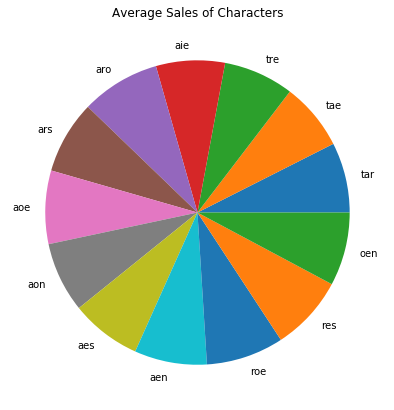

In [13]:
#Pie Graph to show how each triple of characters has very similar average sales
plt.figure(figsize = (7,7))
plt.pie(charData, labels = charLabels)
plt.title("Average Sales of Characters")

Text(0.5, 1.0, 'Average Sales of Unweighted Words')

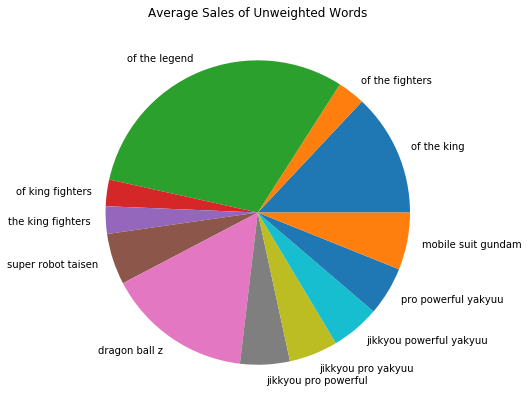

In [14]:
#Pie graph to show how compared to pie graph of characters the average sales of the triples of words is much more varying
plt.figure(figsize = (7,7))
plt.pie(wordData, labels = wordLabels)
plt.title("Average Sales of Unweighted Words")

In [15]:
#Comparing similarities of sets of characters and words found through Apriori
charsPresent = ""
for x in finalCharList:
    print(x)
    charsPresent = charsPresent + x[0] + x[1] + x[2]
charsPresentSet = set(charsPresent)
wordsPresent = ""
for x in finalWordList:
    wordsPresent = x[0] + x[1] + x[2]
wordsPresentSet = set(wordsPresent)
union =  charsPresentSet.union(wordsPresentSet)
intersection = charsPresentSet.intersection(wordsPresentSet)
jaccard = len(intersection) / len(union) #Get Jaccard Similarity
print(jaccard)
print(intersection) #Showing intersection and union of character and word sets
print(union)

['t', 'a', 'r', 5760]
['t', 'a', 'e', 6175]
['t', 'r', 'e', 5943]
['a', 'i', 'e', 5942]
['a', 'r', 'o', 5973]
['a', 'r', 's', 5701]
['a', 'o', 'e', 6162]
['a', 'o', 'n', 5690]
['a', 'e', 's', 6053]
['a', 'e', 'n', 6156]
['r', 'o', 'e', 6059]
['r', 'e', 's', 5823]
['o', 'e', 'n', 5758]
0.5
{'a', 'i', 'n', 's', 'e', 'o', 't'}
{'b', 'l', 'd', 'o', 't', 'a', 'u', 'm', 'i', 'r', 's', 'n', 'g', 'e'}


Apriori for words with support based on sales

In [16]:
#Now to make the lists containing the titles split by characters and words
titleListByWords = []
titleListByWordsUnique = []
lookupTableWords = {}
temp4 = 0
totalSalesSupport = 0
for a in salesListWord:
    t = a[0]
    u = a[1]
    totalSalesSupport = totalSalesSupport + u
    t = t.lower()
    t = t.split(" ")
    tempL2 = []
    tempLU2 = []
    temp2 = 0
    while temp2 < len(t):
        tempL2.append(t[temp2])
        if t[temp2] not in tempLU2:
            tempLU2.append(t[temp2])
        if t[temp2] not in lookupTableWords.keys():
            lookupTableWords[t[temp2]] = temp4
            temp4 = temp4 + 1
        temp2 = temp2 + 1
    titleListByWords.append([tempL2, u])
    titleListByWordsUnique.append([tempLU2, u])
print(titleListByWordsUnique[0])
print(titleListByWords[0])




print("Total Sales: ", totalSalesSupport)

[['wii', 'sports'], 82.74]
[['wii', 'sports'], 82.74]
Total Sales:  8920.440000000732


Apriori with Sales K=1,2 Run

In [17]:
#Counts for words
#K=1 run
temp5 = 0
wordCounts = []
while temp5 < len(lookupTableWords): #Append a 0 for each word to the count list
    wordCounts.append(0)
    temp5 = temp5 + 1
for cl in titleListByWordsUnique: #Go through each title and if word is present then add 1 to count
    for c in cl[0]:
        wordCounts[lookupTableWords[c]] = wordCounts[lookupTableWords[c]] + cl[1]
supportThreshold = totalSalesSupport * 0.00986 #Threshold for Global Sales from words 
qWords = []
for ch in lookupTableWords.keys(): #Go through each word
    ind = lookupTableWords[ch]
    if wordCounts[ind] > supportThreshold: #See if word is greater than support threshold
        if ch != '':
            qWords.append(ch) #If word is greater than support threshold, add to qualified word list
print("Frequent words after K=1 run: ", len(qWords) / len(wordCounts))

#Now for K=2
qWordPairs = []
temp6 = 0
#Getting possible combinations for qualified pairs using qualified words from K=1 run
while temp6 < len(qWords):
    word1 = qWords[temp6]
    temp7 = temp6 + 1 #Start from one spot further than temp6
    while temp7 < len(qWords):#from temp6+1 to end of qualified words, this will get all possible combos
        word2 = qWords[temp7]
        pairCount = [lookupTableWords[word1], lookupTableWords[word2]]
        qWordPairs.append(pairCount) #Adding pair to list
        temp7 = temp7 + 1
    temp6 = temp6 + 1
lookupTable2W = {}
for x in qWordPairs: #Making lookup table for each pair from qualified words
    lookupTable2W[(x[0], x[1])] = 0
for cl in titleListByWordsUnique:
    clQ = []
    for c in cl[0]:
        if c in qWords: #Only need the qualified words, so go through and get qualified words in title
            clQ.append(c)
    temp8 = 0
    while temp8 < len(clQ): #From start of title (only qualified words) to end
        word1 = clQ[temp8]
        word1ID = lookupTableWords[word1]
        temp9 = temp8 + 1
        while temp9 < len(clQ): #From start of temp8 to end, to get all possible pairs from qualified words in title but not have repeats
            word2 = clQ[temp9]
            word2ID = lookupTableWords[word2]
            pair = [word1ID, word2ID] #Create list with the ID's of the words
            pairVal1 = min(pair) #Take min ID
            pair.remove(pairVal1)
            pairVal2 = pair[0] #Take other ID
            pair.remove(pairVal2)
            finalPair = (pairVal1, pairVal2) #This insures that ID is from lowest to highest, like in lookup table
            if finalPair in lookupTable2W.keys():
                lookupTable2W[finalPair] = lookupTable2W[finalPair] + cl[1] #Add Sales for this title to pair
            temp9 = temp9 + 1
        temp8 = temp8 + 1
qualifiedW = []
w = []
for l in lookupTableWords.keys(): #Made a list with all words, the index of the list will be how I go from ID to word
    w.append(l)
for p in lookupTable2W.keys(): #Go through each pair from qualified words
    v = lookupTable2W[p]
    if v > supportThreshold: #If pair exceeds threshold value, then add to qualified list
        pWord1 = w[p[0]] #From ID to word
        pWord2 = w[p[1]]
        qualifiedW.append([pWord1, pWord2, v])
print("List of Qualified Character Pairs [pair, instances]:")
print(qualifiedW)

Frequent words after K=1 run:  0.005420918367346939
List of Qualified Character Pairs [pair, instances]:
[['wii', 'sports', 116.14], ['super', 'mario', 330.2300000000001], ['super', 'bros', 191.98000000000002], ['mario', 'bros', 157.80000000000004], ['mario', 'kart', 109.47000000000001], ['grand', 'theft', 161.59000000000003], ['grand', 'auto', 161.59000000000003], ['theft', 'auto', 161.59000000000003], ['call', 'of', 254.37000000000003], ['call', 'duty', 251.56000000000003], ['call', 'warfare', 98.37], ['of', 'duty', 251.56000000000003], ['of', 'warfare', 98.37], ['of', 'black', 89.71999999999998], ['of', 'the', 375.44999999999897], ['of', 'legend', 96.06], ['duty', 'warfare', 98.37], ['final', 'fantasy', 112.29999999999997], ['the', 'legend', 95.45], ['the', 'lego', 88.36000000000001], ['star', 'wars', 130.74999999999997], ['for', 'need', 102.12999999999998], ['for', 'speed', 102.12999999999998], ['need', 'speed', 102.12999999999998], ['madden', 'nfl', 122.65]]


Apriori Using Sales K=3 Run

In [18]:
qWordTrips = []
newQW = []
#Get list of characters to add on to pairs
for x in qualifiedW:
    if x[0] not in newQW:
        newQW.append(x[0])
    if x[1] not in newQW:
        newQW.append(x[1])
#Get Triples for words
for x in qualifiedW: #Get all possible word triples from qualified pairs
    temp = 0
    word1Ind = lookupTableWords[x[0]]#Get indices of words
    word2Ind = lookupTableWords[x[1]]
    while temp < len(newQW): #Go through each qualified word and add to each pair
        word3 = newQW[temp]
        word3Ind = lookupTableWords[word3]
        if word3 not in x: #Only add if not already in the pair, order indices from least to greatest
            trip = [word1Ind, word2Ind, word3Ind]
            tripVal1 = min(trip)
            trip.remove(tripVal1)
            tripVal2 = min(trip)
            trip.remove(tripVal2)
            tripVal3 = trip[0]
            trip.remove(tripVal3)
            finalTriple = (tripVal1, tripVal2, tripVal3)
            if finalTriple not in qWordTrips:
                qWordTrips.append(finalTriple)
        temp = temp + 1


#Pruning step, want to get only possible triples
#This step takes a very long time with lower support thresholds, but takes around 20 seconds with selected threshold
removal = []
for x in lookupTable2W.keys():
    if lookupTable2W[x] <= supportThreshold:#Check if this pair had less support than threshold
        for y in qWordTrips:
            if x[0] in y:
                if x[1] in y: #If the pair is present in the triple, it cannot have the necessary support
                    removal.append(y) #So mark triple for removal
removalSet = set(removal)
for x in removalSet: #Remove triples with unqualified pairs
    qWordTrips.remove(x)
                    
                    
                    
newQ2W = []
for x in qWordTrips: #Get updated list of qualified characters
    if x[0] not in newQ2W:
        newQ2W.append(x[0])
    if x[1] not in newQ2W:
        newQ2W.append(x[1])
    if x[2] not in newQ2W:
        newQ2W.append(x[2])

        

lookupTable3W = {}
for x in qWordTrips: #Creating new lookup table for updated triples list
    lookupTable3W[(x[0], x[1], x[2])] = 0
for cl in titleListByWordsUnique: #Now go through each title and count instances of triples
    clQ = []
    for c in cl[0]:
        if lookupTableWords[c] in newQ2W: #Take words from title that are in the triples list
            clQ.append(c)
    temp = 0
    while temp < len(clQ): #Go through entire list of qualified words in title
        word1 = clQ[temp]
        word1ID = lookupTableWords[word1] #Get indices of words
        temp2 = temp + 1
        while temp2 < len(clQ): #Go from temp + 1, so that all possible triples are found but not repeated
            word2 = clQ[temp2]
            word2ID = lookupTableWords[word2]
            temp3 = temp2 + 1
            while temp3 < len(clQ): #Go from temp2 + 1, so that all possible triples are found are found but not repeated
                word3 = clQ[temp3]
                word3ID = lookupTableWords[word3]
                l = [word1ID, word2ID, word3ID] #Setup list of indices, order from least to greatest
                tripVal1 = min(l)
                l.remove(tripVal1)
                tripVal2 = min(l)
                l.remove(tripVal2)
                tripVal3 = l[0]
                l.remove(tripVal3)
                trip = (tripVal1, tripVal2, tripVal3)
                if trip in lookupTable3W.keys(): #If trip is in lookup table, then add sales to count
                    lookupTable3W[trip] = lookupTable3W[trip] + cl[1]
                temp3 = temp3 + 1
            temp2 = temp2 + 1
        temp = temp + 1

In [19]:
triples = []
for p in lookupTable3W.keys(): #Get triples that exceed support threshold
    v = lookupTable3W[p]
    if v >= supportThreshold:
        pWord1 = w[p[0]]
        pWord2 = w[p[1]]
        pWord3 = w[p[2]]
        triples.append([pWord1, pWord2, pWord3, v])
print("Qualified Triples:")
print(triples)
finalWordListSales = triples

Qualified Triples:
[['super', 'mario', 'bros', 153.85000000000002], ['grand', 'theft', 'auto', 161.59000000000003], ['call', 'of', 'duty', 251.56000000000003], ['call', 'of', 'warfare', 98.37], ['call', 'duty', 'warfare', 98.37], ['of', 'duty', 'warfare', 98.37], ['of', 'the', 'legend', 93.91000000000001], ['for', 'need', 'speed', 102.12999999999998]]


Now the big name titles with the most sales have the most representation, which is what I was looking for.

In [20]:
#Repeat of code in earlier cell for getting averages and max's on triples
wordSalesList2 = []
for x in finalWordListSales:
    wordSalesTot2 = 0
    wordMaxTitle2 = ""
    wordMaxSale2 = 0
    instances = 0
    for y in salesList:
        if x[0] in y[0].lower():
            if x[1] in y[0].lower():
                if x[2] in y[0].lower():
                    instances = instances + 1
                    wordSalesTot2 = wordSalesTot2 + y[1]
                    if y[1] > wordMaxSale2:
                        wordMaxTitle2 = y[0]
                        wordMaxSale2 = y[1]
    wordMaxSale2 = np.round(wordMaxSale2 * 1000000, 2)
    wordSalesTot2 = wordSalesTot2 / instances
    wordSalesTot2 = np.round(wordSalesTot2 * 1000000, 2)
    wordSalesList2.append([x[0], x[1], x[2], wordSalesTot2, wordMaxTitle2, wordMaxSale2])
print("Sales Data for each Qualified Triple of Words:")
wordLabels2 = []
wordData2 = []
for x in wordSalesList2:
    wordLabels2.append(x[0] + " " + x[1] + " " + x[2])
    wordData2.append(x[3])
    print("Triple ", x[0], x[1], x[2])
    print("Average Sales: ", x[3], "Units")
    print("Top Selling Game: ", x[4], "with ", x[5], " Units")
    print()

Sales Data for each Qualified Triple of Words:
Triple  super mario bros
Average Sales:  13986363.64 Units
Top Selling Game:  Super Mario Bros with  45310000.0  Units

Triple  grand theft auto
Average Sales:  13465833.33 Units
Top Selling Game:  Grand Theft Auto V with  55920000.0  Units

Triple  call of duty
Average Sales:  11979047.62 Units
Top Selling Game:  Call of Duty Black Ops with  31030000.0  Units

Triple  call of warfare
Average Sales:  12296250.0 Units
Top Selling Game:  Call of Duty Modern Warfare 3 with  30830000.0  Units

Triple  call duty warfare
Average Sales:  12296250.0 Units
Top Selling Game:  Call of Duty Modern Warfare 3 with  30830000.0  Units

Triple  of duty warfare
Average Sales:  12296250.0 Units
Top Selling Game:  Call of Duty Modern Warfare 3 with  30830000.0  Units

Triple  of the legend
Average Sales:  1618135.59 Units
Top Selling Game:  The Legend of Zelda Ocarina of Time with  11810000.0  Units

Triple  for need speed
Average Sales:  4642272.73 Units
Top

Comparisons of words using normal support and weighted support

In [21]:
#Comparing similarities of sets of characters and words found through Apriori
wordsPresentReg = []
for x in finalWordList:
    wordsPresentReg.append(x[0])
    wordsPresentReg.append(x[1])
    wordsPresentReg.append(x[2])
wordsPresentRegSet = set(wordsPresentReg) #Set of words present in unweighted set

wordsPresentSales = []
for x in finalWordListSales:
    wordsPresentSales.append(x[0])
    wordsPresentSales.append(x[1])
    wordsPresentSales.append(x[2])
wordsPresentSalesSet = set(wordsPresentSales) #Set of words present in weighted set
union2 =  wordsPresentRegSet.union(wordsPresentSalesSet)
intersection2 = wordsPresentRegSet.intersection(wordsPresentSalesSet)
jaccard2 = len(intersection2) / len(union2) #Jaccard Similarity of unweighted and weighted word sets
print(jaccard2)
print(intersection2)
print(union2)

0.13793103448275862
{'super', 'of', 'legend', 'the'}
{'need', 'warfare', 'ball', 'pro', 'of', 'jikkyou', 'dragon', 'robot', 'z', 'speed', 'the', 'theft', 'gundam', 'call', 'super', 'duty', 'mobile', 'powerful', 'yakyuu', 'for', 'mario', 'bros', 'suit', 'auto', 'legend', 'fighters', 'taisen', 'grand', 'king'}


Very low Jaccard Similarity, so the lists generated by unweighted and weighted methods are very different.

Text(0.5, 1.0, 'Average Sales of Weighted Words')

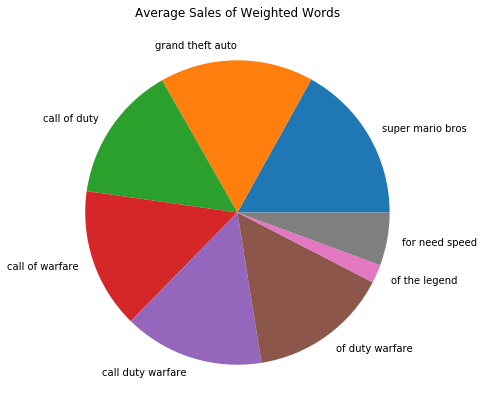

In [22]:
#Pie graph to show how much more evenly distributed the average sales are in this graph compared to the unweighted words graph
plt.figure(figsize = (7,7))
plt.pie(wordData2, labels = wordLabels2)
plt.title("Average Sales of Weighted Words")

Comparison of Average Sales Between Top 5 Weighted and Unweighted Word Triples


<function matplotlib.pyplot.show(*args, **kw)>

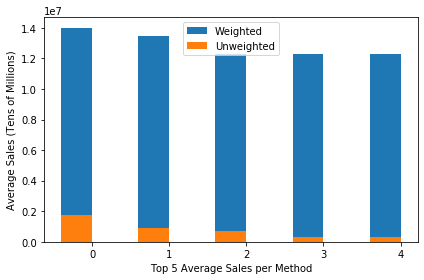

In [23]:
#Comparing average sales from top 5 of weighted word triples to unweighted word triples
#Used matplotlib website for help making this bar graph https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
lab = ["1", "2", "3", "4", "5"]
#Get ordered weighted words
temp = 0
maxWordSaleOrder = []
wordSalesList2C = wordSalesList2.copy()
while temp < len(wordSalesList2):
    maxSaleVal = 0
    maxSaleInd = 0
    temp2 = 0
    while temp2 < len(wordSalesList2C):
        if wordSalesList2C[temp2][3] > maxSaleVal:
            maxSaleVal = wordSalesList2C[temp2][3]
            maxSaleInd = temp2
            maxSaleI = wordSalesList2C[temp2]
        temp2 = temp2 + 1
    maxWordSaleOrder.append(maxSaleI)
    wordSalesList2C.remove(wordSalesList2C[maxSaleInd])
    temp = temp + 1

#Get ordered unweighted words
temp = 0
maxUWordSaleOrder = []
wordSalesListC = wordSalesList.copy()
while temp < len(wordSalesList):
    maxSaleVal = 0
    maxSaleInd = 0
    temp2 = 0
    while temp2 < len(wordSalesListC):
        if wordSalesListC[temp2][3] > maxSaleVal:
            maxSaleVal = wordSalesListC[temp2][3]
            maxSaleInd = temp2
            maxSaleI = wordSalesListC[temp2]
        temp2 = temp2 + 1
    maxUWordSaleOrder.append(maxSaleI)
    wordSalesListC.remove(wordSalesListC[maxSaleInd])
    temp = temp + 1

#Get ordered characters
temp = 0
maxCharSaleOrder = []
charSalesListC = charSalesList.copy()
while temp < len(charSalesList):
    maxSaleVal = 0
    maxSaleInd = 0
    temp2 = 0
    while temp2 < len(charSalesListC):
        if charSalesListC[temp2][3] > maxSaleVal:
            maxSaleVal = charSalesListC[temp2][3]
            maxSaleInd = temp2
            maxSaleI = charSalesListC[temp2]
        temp2 = temp2 + 1
    maxCharSaleOrder.append(maxSaleI)
    charSalesListC.remove(charSalesListC[maxSaleInd])
    temp = temp + 1
            
top5Weighted = [maxWordSaleOrder[0][3], maxWordSaleOrder[1][3], maxWordSaleOrder[2][3], maxWordSaleOrder[3][3], maxWordSaleOrder[4][3]]
top5Unweighted = [maxUWordSaleOrder[0][3], maxUWordSaleOrder[1][3], maxUWordSaleOrder[2][3], maxUWordSaleOrder[3][3], maxUWordSaleOrder[4][3]]
loc = np.arange(5)

print("Comparison of Average Sales Between Top 5 Weighted and Unweighted Word Triples")
f, a = plt.subplots()
r1 = a.bar(loc - 0.2, top5Weighted, 0.4, label = "Weighted")
r2 = a.bar(loc - 0.2, top5Unweighted, 0.4, label = "Unweighted")
a.set_ylabel("Average Sales (Tens of Millions)")
a.set_xlabel("Top 5 Average Sales per Method")
a.set_xticks(loc, lab)
a.legend()
f.tight_layout()
plt.show

Comparisons to Average Sales from Genres

In [24]:
genreSalesList = []
for x in genreList:
    genreSalesList.append(np.round(x[3] * 1000000, 2)) #Append actual unit sales

Text(0, 0.5, 'Average Sales')

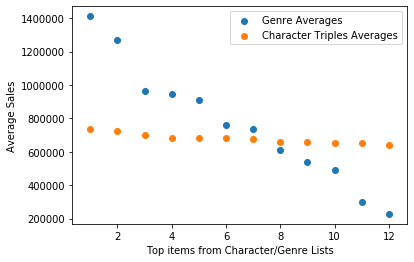

In [25]:
#Character triples vs Genres
ref = [1,2,3,4,5,6,7,8,9,10,11,12]
charDataMTL = [maxCharSaleOrder[0][3], maxCharSaleOrder[1][3], maxCharSaleOrder[2][3], maxCharSaleOrder[3][3], maxCharSaleOrder[4][3], maxCharSaleOrder[5][3], maxCharSaleOrder[6][3], maxCharSaleOrder[7][3], maxCharSaleOrder[8][3], maxCharSaleOrder[9][3], maxCharSaleOrder[10][3], maxCharSaleOrder[11][3], ]
genreDataMTL = [maxGenreSaleOrder[0][3], maxGenreSaleOrder[1][3], maxGenreSaleOrder[2][3], maxGenreSaleOrder[3][3], maxGenreSaleOrder[4][3], maxGenreSaleOrder[5][3], maxGenreSaleOrder[6][3], maxGenreSaleOrder[7][3], maxGenreSaleOrder[8][3], maxGenreSaleOrder[9][3], maxGenreSaleOrder[10][3], maxGenreSaleOrder[11][3], ]
plt.scatter(ref, genreDataMTL, label = "Genre Averages")
plt.scatter(ref, charDataMTL, label = "Character Triples Averages")
plt.legend()
plt.xlabel("Top items from Character/Genre Lists")
plt.ylabel("Average Sales")

Not a ton can be drawn from this graph I think, the characters are all common in a heavy majority of the titles, so the sales averages here don't mean much.

Text(0, 0.5, 'Average Sales')

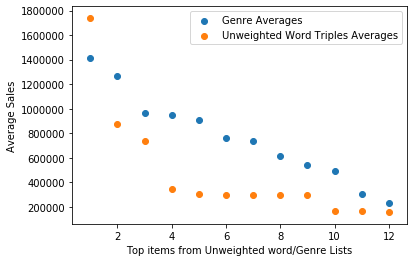

In [26]:
#Unweighted word triples vs Genres:
unWeightedDataMTL = [maxUWordSaleOrder[0][3], maxUWordSaleOrder[1][3], maxUWordSaleOrder[2][3], maxUWordSaleOrder[3][3], maxUWordSaleOrder[4][3], maxUWordSaleOrder[5][3], maxUWordSaleOrder[6][3], maxUWordSaleOrder[7][3], maxUWordSaleOrder[8][3], maxUWordSaleOrder[9][3], maxUWordSaleOrder[10][3], maxUWordSaleOrder[11][3], ]
plt.scatter(ref, genreDataMTL, label = "Genre Averages")
plt.scatter(ref, unWeightedDataMTL, label = "Unweighted Word Triples Averages")
plt.legend()
plt.xlabel("Top items from Unweighted word/Genre Lists")
plt.ylabel("Average Sales")

Here the average sales for Genres generally does better than the average sales for the unweighted triples, so it seems that Genres have a higher correlation to sales.

Text(0, 0.5, 'Average Sales (Tens of Millions)')

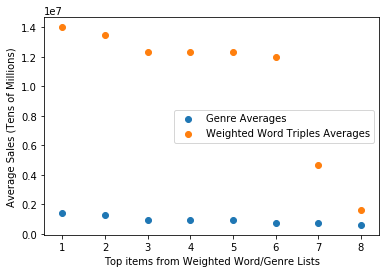

In [27]:
#Weighted word triples vs Genres:
ref = [1,2,3,4,5,6,7,8]
weightedDataMTL = [maxWordSaleOrder[0][3], maxWordSaleOrder[1][3], maxWordSaleOrder[2][3], maxWordSaleOrder[3][3], maxWordSaleOrder[4][3], maxWordSaleOrder[5][3], maxWordSaleOrder[6][3], maxWordSaleOrder[7][3]]
genreDataMTL = [maxGenreSaleOrder[0][3], maxGenreSaleOrder[1][3], maxGenreSaleOrder[2][3], maxGenreSaleOrder[3][3], maxGenreSaleOrder[4][3], maxGenreSaleOrder[5][3], maxGenreSaleOrder[6][3], maxGenreSaleOrder[7][3]]
plt.scatter(ref, genreDataMTL, label = "Genre Averages")
plt.scatter(ref, weightedDataMTL, label = "Weighted Word Triples Averages")
plt.legend()
plt.xlabel("Top items from Weighted Word/Genre Lists")
plt.ylabel("Average Sales (Tens of Millions)")

Here the weighted triples correlate much more to average sales than the genres do, which makes sense because the triples from the weighted Apriori are made up of the top selling games. 

I will go into much more detail in the Project Write-up, but my main conclussions are that Genres correlate much better to sales than characters or unweighted words. However, the word triples generated through my weighted Apriori correlated much more to higher average sales than the Genre's did. 